<a href="https://colab.research.google.com/github/Mahaveer369/git-tuts/blob/main/cyberbully_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Step 1: Collect and preprocess the dataset
# Assuming you have a CSV file with two columns: 'tweet' and 'label'
df = pd.read_csv("/content/CyberBullyingTypesDataset.csv")

In [ ]:
df

,Tweet,Class
0,Post-Cuomo push to toughen NY sexual harassmen...,Sexual Harassment
1,Push to toughen NY sexual harassment laws that...,Sexual Harassment
2,@GabbieHanna As if Trisha didn’t accuse him of...,Sexual Harassment
3,@fentsemadii True is that 🔥 thou I know nothin...,Sexual Harassment
4,Watch the recap video of the two-day hands-on ...,Sexual Harassment
...,...,...
2135,@missmayim @Jeopardy A travesty that they chos...,Slut Shaming
2136,"@waggykookie They're 11yo cursing, slut shamin...",Slut Shaming
2137,@Cynosure_Nikaaa Just need attention in the na...,Slut Shaming
2138,Y’all hate slut-shaming til you can do it oh okay,Slut Shaming


<ipython-input-5-8575b7b38ed8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.Class,palette=["grey","red","blue","green","cyan"])


Text(0.5, 1.0, 'Distribution of Cyberbully Classes')

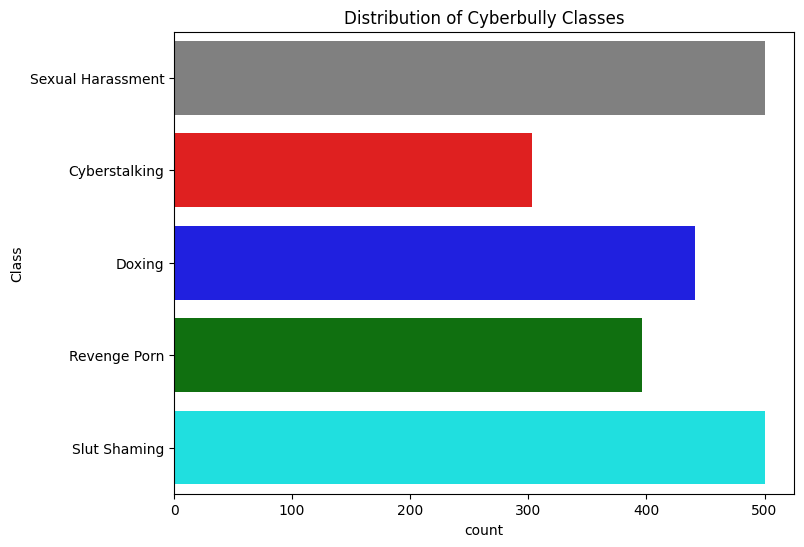

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(df.Class,palette=["grey","red","blue","green","cyan"])
plt.title("Distribution of Cyberbully Classes")

In [ ]:
# Preprocessing
# Import necessary libraries
stop_words = set(stopwords.words('english'))
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
#u can observe that here in this colum Twwet we seen no stop words bcz by using above code
df

,Tweet,Class
0,Post-Cuomo push toughen NY sexual harassment l...,Sexual Harassment
1,Push toughen NY sexual harassment laws Gov. Cu...,Sexual Harassment
2,@GabbieHanna As Trisha didn’t accuse sexual ha...,Sexual Harassment
3,@fentsemadii True 🔥 thou I know nothing sexual...,Sexual Harassment
4,Watch recap video two-day hands-on Executive W...,Sexual Harassment
...,...,...
2135,@missmayim @Jeopardy A travesty chose slut- sh...,Slut Shaming
2136,"@waggykookie They're 11yo cursing, slut shamin...",Slut Shaming
2137,@Cynosure_Nikaaa Just need attention name slut...,Slut Shaming
2138,Y’all hate slut-shaming til oh okay,Slut Shaming


In [ ]:
# Step 2: Implement feature extraction techniques
# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['Tweet'])

In [ ]:
X_bow

<2140x8056 sparse matrix of type '<class 'numpy.int64'>'
	with 26784 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_bow)

  (0, 5524)	1
  (0, 1867)	1
  (0, 5684)	1
  (0, 7202)	1
  (0, 5059)	1
  (0, 6348)	1
  (0, 3224)	1
  (0, 4155)	1
  (0, 3412)	1
  (0, 1602)	1
  (0, 1021)	1
  (1, 1867)	1
  (1, 5684)	1
  (1, 7202)	1
  (1, 5059)	1
  (1, 6348)	1
  (1, 3224)	1
  (1, 4155)	1
  (1, 3412)	1
  (1, 1602)	1
  (1, 3079)	1
  (1, 2448)	1
  (1, 7541)	1
  (1, 397)	1
  (1, 484)	1
  :	:
  (2136, 1877)	1
  (2136, 1278)	1
  (2137, 4861)	1
  (2137, 4907)	1
  (2137, 3897)	1
  (2137, 797)	1
  (2137, 6791)	1
  (2137, 6512)	1
  (2137, 6378)	1
  (2137, 1912)	1
  (2137, 619)	1
  (2137, 6369)	1
  (2138, 5155)	1
  (2138, 5136)	1
  (2138, 3240)	1
  (2138, 548)	1
  (2138, 6512)	1
  (2138, 6378)	1
  (2138, 7137)	1
  (2139, 4248)	1
  (2139, 4556)	1
  (2139, 6512)	1
  (2139, 6378)	1
  (2139, 2710)	1
  (2139, 2529)	1


In [ ]:
 #TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Tweet'])

In [ ]:
X

<2140x8056 sparse matrix of type '<class 'numpy.float64'>'
	with 26784 stored elements in Compressed Sparse Row format>

In [ ]:
print(X)

  (0, 1021)	0.4493744526699275
  (0, 1602)	0.07523595423256044
  (0, 3412)	0.07530960348345557
  (0, 4155)	0.31964296571879636
  (0, 3224)	0.15525089317063848
  (0, 6348)	0.15199666406009366
  (0, 5059)	0.36463222196276596
  (0, 7202)	0.42652987179353713
  (0, 5684)	0.41032138371554666
  (0, 1867)	0.2523753812935486
  (0, 5524)	0.30068555836501054
  (1, 3917)	0.33160126990954847
  (1, 5853)	0.19306319089279905
  (1, 484)	0.30278332714000283
  (1, 397)	0.30278332714000283
  (1, 7541)	0.33160126990954847
  (1, 2448)	0.3147438540414359
  (1, 3079)	0.27396538437045725
  (1, 1602)	0.055517926793890636
  (1, 3412)	0.055572273864534304
  (1, 4155)	0.2358701361865388
  (1, 3224)	0.1145623500047726
  (1, 6348)	0.11216099741514086
  (1, 5059)	0.26906849540377775
  (1, 7202)	0.3147438540414359
  :	:
  (2136, 1602)	0.05095198316607709
  (2136, 3412)	0.05100186058745202
  (2137, 6369)	0.39545245775819343
  (2137, 619)	0.39545245775819343
  (2137, 1912)	0.39545245775819343
  (2137, 6378)	0.134138964

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
y=le.fit_transform(df['Class'])

In [ ]:
y

array([3, 3, 3, ..., 4, 4, 4])

In [ ]:
# Step 3: Select and train a machine learning model for tweet classification
# Split the data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
models = [RandomForestClassifier(n_estimators=50, random_state=0),LinearSVC(),MultinomialNB(),LogisticRegression(random_state=0)]

RandomForestClassifier(n_estimators=50, random_state=0)


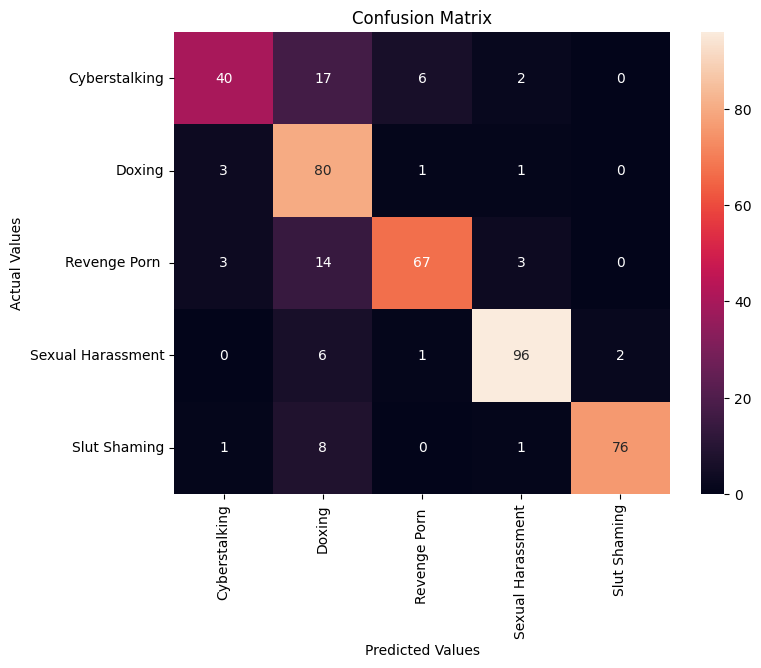

              precision    recall  f1-score   support

           0       0.85      0.62      0.71        65
           1       0.64      0.94      0.76        85
           2       0.89      0.77      0.83        87
           3       0.93      0.91      0.92       105
           4       0.97      0.88      0.93        86

    accuracy                           0.84       428
   macro avg       0.86      0.82      0.83       428
weighted avg       0.86      0.84      0.84       428

LinearSVC()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


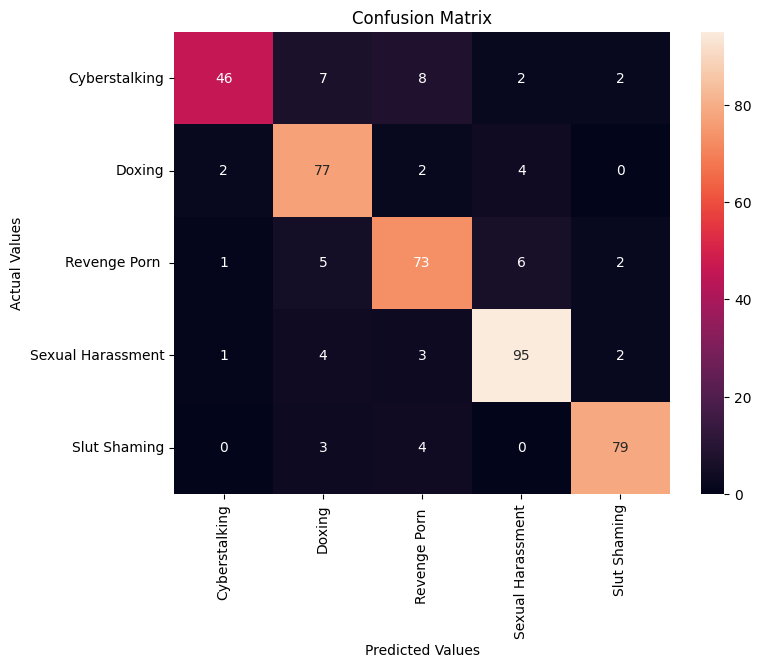

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        65
           1       0.80      0.91      0.85        85
           2       0.81      0.84      0.82        87
           3       0.89      0.90      0.90       105
           4       0.93      0.92      0.92        86

    accuracy                           0.86       428
   macro avg       0.87      0.86      0.86       428
weighted avg       0.87      0.86      0.86       428

MultinomialNB()


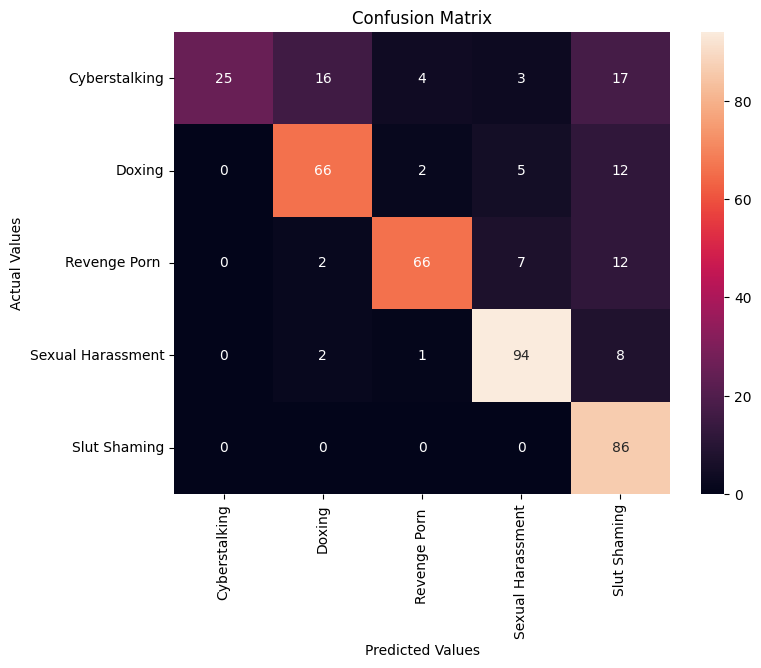

              precision    recall  f1-score   support

           0       1.00      0.38      0.56        65
           1       0.77      0.78      0.77        85
           2       0.90      0.76      0.82        87
           3       0.86      0.90      0.88       105
           4       0.64      1.00      0.78        86

    accuracy                           0.79       428
   macro avg       0.83      0.76      0.76       428
weighted avg       0.83      0.79      0.78       428

LogisticRegression(random_state=0)


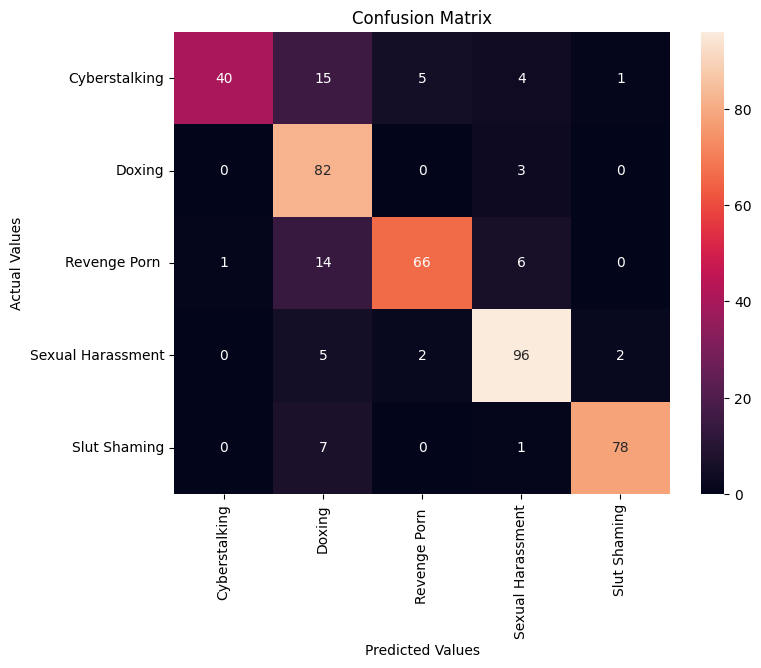

              precision    recall  f1-score   support

           0       0.98      0.62      0.75        65
           1       0.67      0.96      0.79        85
           2       0.90      0.76      0.82        87
           3       0.87      0.91      0.89       105
           4       0.96      0.91      0.93        86

    accuracy                           0.85       428
   macro avg       0.88      0.83      0.84       428
weighted avg       0.87      0.85      0.85       428



In [ ]:
for m in models:
   m.fit(x_train,y_train)
   y_pred=m.predict(x_test)
   cm=confusion_matrix(y_test,y_pred)
   cm_df=pd.DataFrame(cm,index = ['Cyberstalking','Doxing','Revenge Porn ','Sexual Harassment','Slut Shaming'],
                     columns = ['Cyberstalking','Doxing','Revenge Porn ','Sexual Harassment','Slut Shaming'])
   print(m)
   plt.figure(figsize=(8,6))
   sns.heatmap(cm_df,annot=True)
   plt.title("Confusion Matrix")
   plt.xlabel("Predicted Values")
   plt.ylabel("Actual Values")

   plt.show()
   print(metrics.classification_report(y_test,y_pred))

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

    Cyberstalking       0.98      0.62      0.75        65
           Doxing       0.67      0.96      0.79        85
     Revenge Porn       0.90      0.76      0.82        87
Sexual Harassment       0.87      0.91      0.89       105
     Slut Shaming       0.96      0.91      0.93        86

         accuracy                           0.85       428
        macro avg       0.88      0.83      0.84       428
     weighted avg       0.87      0.85      0.85       428



In [ ]:
len(df)

2140